Dibuat untuk memenuhi tugas akhir menggunakan data Pinjaman dari Rakamin Academy.

In [ ]:
# DataFrame
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Datetime
import datetime

# Data Preparation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [ ]:
df = pd.read_csv('loan_data_2007_2014 (1).csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3527 entries, 0 to 3526
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3527 non-null   int64  
 1   id                           3527 non-null   int64  
 2   member_id                    3527 non-null   int64  
 3   loan_amnt                    3526 non-null   float64
 4   funded_amnt                  3526 non-null   float64
 5   funded_amnt_inv              3526 non-null   float64
 6   term                         3526 non-null   object 
 7   int_rate                     3526 non-null   float64
 8   installment                  3526 non-null   float64
 9   grade                        3526 non-null   object 
 10  sub_grade                    3526 non-null   object 
 11  emp_title                    3317 non-null   object 
 12  emp_length                   3421 non-null   object 
 13  home_ownership    

In [ ]:
df.isna().sum()

Unnamed: 0             0
id                     0
member_id              0
loan_amnt              1
funded_amnt            1
                    ... 
all_util            3527
total_rev_hi_lim    3527
inq_fi              3527
total_cu_tl         3527
inq_last_12m        3527
Length: 75, dtype: int64

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])
df = df.dropna(axis=1, how='all')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3527 entries, 0 to 3526
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3527 non-null   int64  
 1   member_id                   3527 non-null   int64  
 2   loan_amnt                   3526 non-null   float64
 3   funded_amnt                 3526 non-null   float64
 4   funded_amnt_inv             3526 non-null   float64
 5   term                        3526 non-null   object 
 6   int_rate                    3526 non-null   float64
 7   installment                 3526 non-null   float64
 8   grade                       3526 non-null   object 
 9   sub_grade                   3526 non-null   object 
 10  emp_title                   3317 non-null   object 
 11  emp_length                  3421 non-null   object 
 12  home_ownership              3526 non-null   object 
 13  annual_inc                  3526 

In [ ]:
not_relevant = [
    'id', 'member_id', 'issue_d', 'url', 'delinq_2yrs', 'inq_last_6mths',
    'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp',
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
    'collections_12_mths_ex_med'
]

df = df.drop(not_relevant, axis=1)

Exploratory data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3527 entries, 0 to 3526
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            3526 non-null   float64
 1   funded_amnt          3526 non-null   float64
 2   funded_amnt_inv      3526 non-null   float64
 3   term                 3526 non-null   object 
 4   int_rate             3526 non-null   float64
 5   installment          3526 non-null   float64
 6   grade                3526 non-null   object 
 7   sub_grade            3526 non-null   object 
 8   emp_title            3317 non-null   object 
 9   emp_length           3421 non-null   object 
 10  home_ownership       3526 non-null   object 
 11  annual_inc           3526 non-null   float64
 12  verification_status  3526 non-null   object 
 13  loan_status          3526 non-null   object 
 14  pymnt_plan           3526 non-null   object 
 15  desc                 1946 non-null   o

In [ ]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,policy_code,acc_now_delinq
count,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.0,3526.0
mean,13009.167612,12828.942144,12783.029932,13.037178,375.674665,65545.215899,14.454651,9.418888,0.028077,14237.623653,60.054912,21.636415,1.0,0.0
std,8096.217671,7896.859757,7853.843879,4.132848,219.634740,39280.708605,6.358672,3.960597,0.166925,12518.287539,25.816896,10.491278,0.0,0.0
min,1000.000000,1000.000000,1000.000000,6.000000,32.230000,8400.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.0,0.0
25%,6625.000000,6625.000000,6625.000000,9.910000,207.792500,40527.000000,9.650000,7.000000,0.000000,6592.000000,43.800000,14.000000,1.0,0.0
50%,12000.000000,12000.000000,11787.500000,12.690000,338.930000,57000.000000,14.520000,9.000000,0.000000,11596.000000,64.600000,20.000000,1.0,0.0
75%,17600.000000,17000.000000,17000.000000,16.290000,494.590000,80000.000000,19.470000,12.000000,0.000000,18249.750000,80.375000,28.000000,1.0,0.0
max,35000.000000,35000.000000,35000.000000,24.110000,1283.500000,550000.000000,29.850000,34.000000,2.000000,131949.000000,99.900000,79.000000,1.0,0.0


Feature Engineering

In [ ]:
df = df.copy()
print("Data Sebelum pemeriksaan Duplicate")
print(df.shape)


Data Sebelum pemeriksaan Duplicate
(3527, 31)


In [ ]:
#Check Duplicated Data
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print("Data Sesudah pemeriksaan Duplicate")
print(df.shape)

Data Sesudah pemeriksaan Duplicate
(3527, 31)


In [ ]:
fully_paid_classes = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
df_fully_paid = df[df['loan_status'].isin(fully_paid_classes)]


In [ ]:
df_fully_paid['loan_status'].value_counts().sum()


2565

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid            2565
Charged Off            583
Current                363
Late (31-120 days)       7
In Grace Period          5
Late (16-30 days)        2
Default                  1
Name: count, dtype: int64

<ipython-input-41-c6c9670d2713>:4: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.barplot(x=count.index, y=count.values, hue=count.index, legend=False, palette=['blue', 'yellow'])


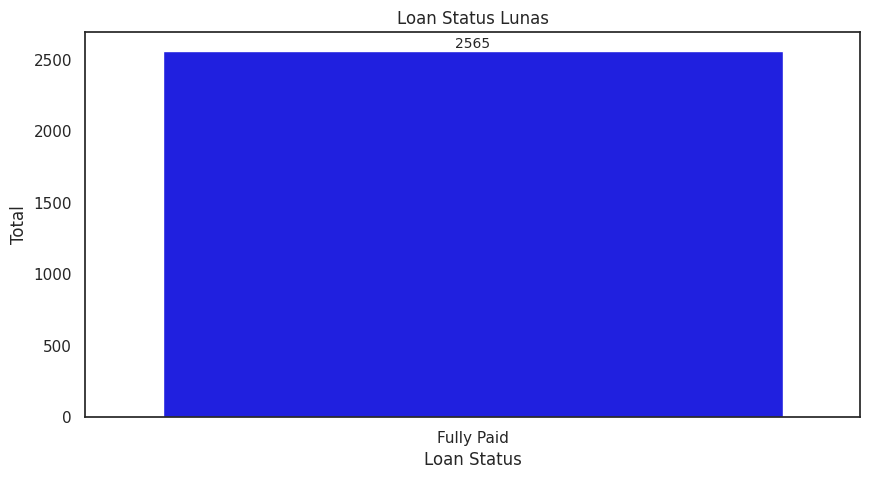

In [ ]:
plt.figure(figsize=(10, 5))

count = df_fully_paid['loan_status'].value_counts()
ax = sns.barplot(x=count.index, y=count.values, hue=count.index, legend=False, palette=['blue', 'yellow'])

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Loan Status Lunas')
plt.xlabel('Loan Status')
plt.ylabel('Total')

plt.show()

In [ ]:
charged_off_classes = ['Charged Off', 'Default']
df_charged_off = df[df['loan_status'].isin(charged_off_classes)]

In [ ]:
df_charged_off['loan_status'].value_counts().sum()


584

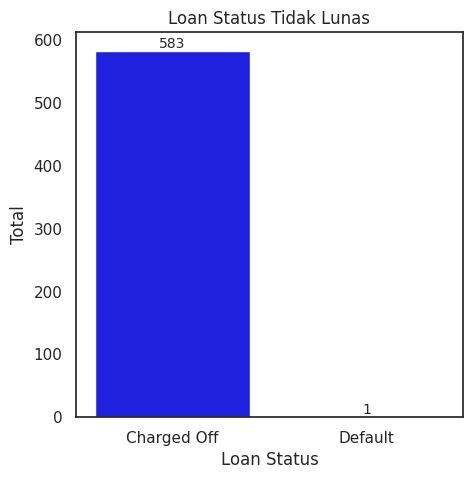

In [ ]:
plt.figure(figsize=(5, 5))

count = df_charged_off['loan_status'].value_counts()
ax = sns.barplot(x=count.index, y=count.values, hue=count.index, legend=False, palette=['blue', 'yellow'])

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Loan Status Tidak Lunas')
plt.xlabel('Loan Status')
plt.ylabel('Total')

plt.show()

In [ ]:
df['loan_status'] = np.where(df['loan_status'].isin(["Fully Paid",
                                                     "Does not meet the credit policy. Status:Fully Paid"
                                                     ]),
                             "Fully Paid",
                             df['loan_status'])

In [ ]:
df['loan_status'] = np.where(df['loan_status'].isin(["Charged Off",
                                                     "Default"
                                                     ]),
                             "Charged Off",
                             df['loan_status'])

In [ ]:
df = df[df['loan_status'].isin(["Fully Paid", "Charged Off"])]

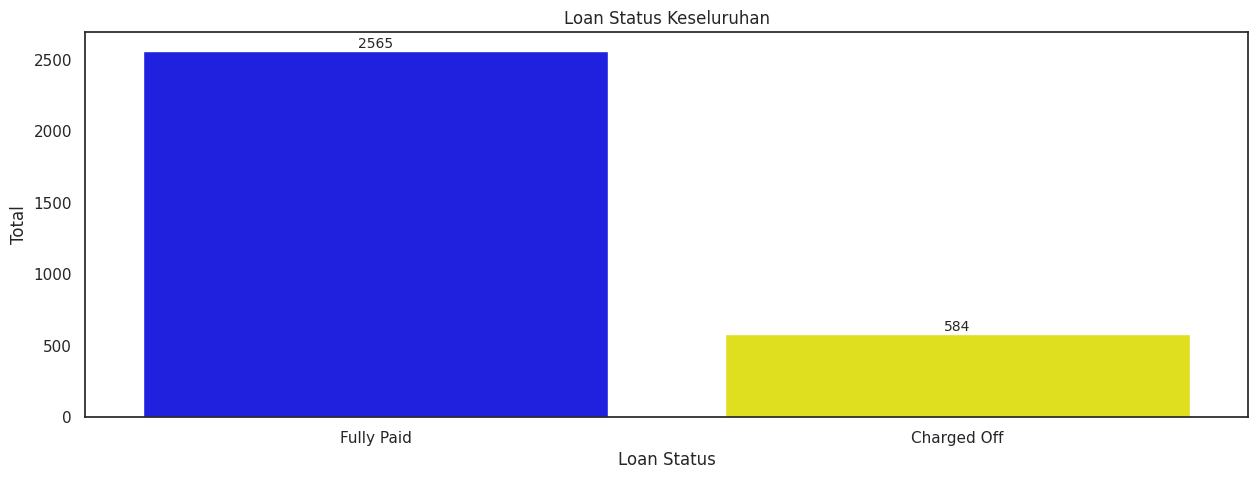

In [ ]:
plt.figure(figsize=(15, 5))

count = df['loan_status'].value_counts()
ax = sns.barplot(x=count.index, y=count.values, hue=count.index, legend=False, palette=['blue', 'yellow'])

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Loan Status Keseluruhan')
plt.xlabel('Loan Status')
plt.ylabel('Total')

plt.show()


In [ ]:
le = LabelEncoder()

In [ ]:
df.loan_status = le.fit_transform(df.loan_status)

In [ ]:
print(le.classes_)

['Charged Off' 'Fully Paid']


In [ ]:
print(le.transform(['Charged Off', 'Fully Paid']))

[0 1]


In [ ]:
ohe = OneHotEncoder(sparse_output=False)
scaler = MinMaxScaler()

In [ ]:
categories = df.select_dtypes(include=[object]).columns.tolist()

In [ ]:
numerics = df.drop(['loan_status'], axis=1).select_dtypes(include=np.number).columns.tolist()

In [ ]:
ct = ColumnTransformer(
    [("onehotencoder", ohe, categories),
     ("minmaxscaler", scaler, numerics)],
    remainder = 'passthrough'
)

ct.set_output(transform='pandas')
processed_df = ct.fit_transform(df.drop(['loan_status'], axis=1))

In [ ]:
train, test = train_test_split(processed_df, test_size=0.2, random_state=42)

In [ ]:
print(train.shape)
print(test.shape)

(2519, 7042)
(630, 7042)


In [ ]:
pd.crosstab(df['emp_length'], df['loan_status'], normalize='index').round(2)

loan_status,0,1
emp_length,,
1 year,0.19,0.81
10+ years,0.20,0.80
2 years,0.17,0.83
3 years,0.16,0.84
4 years,0.16,0.84
5 years,0.18,0.82
6 years,0.17,0.83
7 years,0.18,0.82
8 years,0.21,0.79


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2519 entries, 2576 to 949
Columns: 7042 entries, onehotencoder__term_ 36 months to minmaxscaler__acc_now_delinq
dtypes: float64(7042)
memory usage: 135.4 MB
None


In [ ]:
print(train.columns)


Index(['onehotencoder__term_ 36 months', 'onehotencoder__term_ 60 months',
       'onehotencoder__grade_A', 'onehotencoder__grade_B',
       'onehotencoder__grade_C', 'onehotencoder__grade_D',
       'onehotencoder__grade_E', 'onehotencoder__grade_F',
       'onehotencoder__grade_G', 'onehotencoder__sub_grade_A1',
       ...
       'minmaxscaler__installment', 'minmaxscaler__annual_inc',
       'minmaxscaler__dti', 'minmaxscaler__open_acc', 'minmaxscaler__pub_rec',
       'minmaxscaler__revol_bal', 'minmaxscaler__revol_util',
       'minmaxscaler__total_acc', 'minmaxscaler__policy_code',
       'minmaxscaler__acc_now_delinq'],
      dtype='object', length=7042)


In [ ]:
df[df['emp_length'].isnull()]['loan_status'].value_counts()

loan_status
1    64
0    27
Name: count, dtype: int64

In [ ]:
columns_to_check = ['annual_inc', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq']

for column in columns_to_check:
    print(f"Komposisi dari kolom {column} yang memiliki nilai NaN:")
    print(df[df[column].isnull()]['loan_status'].value_counts())
    print("")

Komposisi dari kolom annual_inc yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)

Komposisi dari kolom earliest_cr_line yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)

Komposisi dari kolom open_acc yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)

Komposisi dari kolom pub_rec yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)

Komposisi dari kolom revol_util yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)

Komposisi dari kolom total_acc yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)

Komposisi dari kolom acc_now_delinq yang memiliki nilai NaN:
Series([], Name: count, dtype: int64)



In [ ]:
cols = ['annual_inc', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq']
for col in cols:
  df = df[df[col].notnull()]

In [ ]:

processed_df.loan_status.value_counts()

AttributeError: 'DataFrame' object has no attribute 'loan_status'

In [ ]:
train.loan_status.value_counts()

AttributeError: 'DataFrame' object has no attribute 'loan_status'

In [ ]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

KeyError: "['loan_status'] not found in axis"

In [ ]:
ann_clf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NameError: name 'X_train' is not defined

In [ ]:

ann_clf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

NameError: name 'ann_clf' is not defined

In [ ]:
history = ann_clf.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test)
)

NameError: name 'ann_clf' is not defined

In [ ]:
key = ['RandomForestClassifier',
       'AdaBoostClassifier',
       'KNeighborsClassifier',
       'NeuralNetwork']

value = [RandomForestClassifier(n_estimators=100, random_state=0, max_depth=None),
         AdaBoostClassifier(),
         LogisticRegression(max_iter=1000),
         KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto')]

models = dict(zip(key, value))

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
accuracy = pd.DataFrame(columns=['Accuracy Score'], index=key)

for name, algo in models.items():

  model = algo
  model.fit(X_train,y_train)

  if name == 'NeuralNetwork':
    predict = (ann_clf.predict(X_test) > 0.5).astype("int32")
  else:
    predict = model.predict(X_test)

  accuracy.loc[name] = accuracy_score(y_test, predict)

accuracy

NameError: name 'X_train' is not defined

In [ ]:

plt.figure(figsize=(10, 5))

ax = sns.barplot(data=accuracy, x="Accuracy Score", y=accuracy.index, hue=accuracy.index, legend=False, orient='y')

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Perbandingan Skor Akurasi untuk Setiap Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xlim(0, 1)

plt.show()

NameError: name 'accuracy' is not defined

<Figure size 1000x500 with 0 Axes>